In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

df_aapl = pd.read_csv('/content/drive/MyDrive/AI/RL_stock/data/AAPL_5min.txt', names=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], header=None)


In [ ]:
df_400k = df_aapl.copy(deep=True)[-400000:]
# 703264

In [ ]:
df_400k

,Date,Open,High,Low,Close,Volume
303265,2013-06-04 10:25:00,14.1153,14.1314,14.0994,14.1255,4809196
303266,2013-06-04 10:30:00,14.1233,14.1470,14.1187,14.1430,7700280
303267,2013-06-04 10:35:00,14.1431,14.1454,14.1221,14.1265,4905208
303268,2013-06-04 10:40:00,14.1255,14.1433,14.1212,14.1252,2407468
303269,2013-06-04 10:45:00,14.1249,14.1414,14.1118,14.1339,2473884
...,...,...,...,...,...,...
703260,2022-09-26 19:35:00,151.0600,151.1000,151.0300,151.0300,1413
703261,2022-09-26 19:40:00,151.0400,151.0900,150.9600,150.9600,2653
703262,2022-09-26 19:45:00,150.9600,150.9600,150.9000,150.9500,2553
703263,2022-09-26 19:50:00,150.9400,151.2300,150.9400,151.2100,6354


In [ ]:
def qLearning(df):
  # State representation: Simple, using only 'Close' prices
  states = df['Close'].values

  # Q-table, rows are states (prices here), columns are actions (0=Buy, 1=Sell, 2=Hold)
  Q = np.zeros((len(states), 3))

  # Hyperparameters
  alpha = 0.1  # Learning rate
  gamma = 0.95  # Discount factor
  epsilon = 0.1  # Exploration rate

  # For simplicity, simulate trading over the same data multiple times (epochs)
  epochs = 10
  stock_owned = 0
  capital = 1000  # Initial capital, can buy at most one stock
  profit = 0

  for epoch in range(epochs):
      for i in range(len(states) - 1):
          current_state = i
          next_state = i + 1

          # Epsilon-greedy policy for action selection
          if random.uniform(0, 1) < epsilon:
              action = random.randint(0, 2)  # Explore action space
          else:
              action = np.argmax(Q[current_state])  # Exploit learned values

          # Simulate action and observe reward
          reward = 0
          if action == 0 and capital >= states[current_state]:  # Buy
              stock_owned += 1
              capital -= states[current_state]
          elif action == 1 and stock_owned > 0:  # Sell
              stock_owned -= 1
              capital += states[current_state]
              reward = states[current_state] - states[current_state - 1]  # Profit from last buy
          elif action == 2:  # Hold
              reward = 0  # No action taken

          # Q-learning update
          Q[current_state, action] = Q[current_state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[current_state, action])

  # Results
  print("Final Q-table:")
  print(Q)

  # Print out the final capital after trading
  final_capital = capital + stock_owned * states[-1]
  print("Final capital:", final_capital)

  return Q, final_capital


# 300k/5min/AAPL

In [ ]:
df_300k = df_aapl.copy(deep=True)[-300000:]
Q_300k, final_capital_300k = qLearning(df_300k)

Final Q-table:
[[ 1.11035630e-10  0.00000000e+00  0.00000000e+00]
 [ 2.22071260e-09  0.00000000e+00  0.00000000e+00]
 [ 1.78395195e-07 -7.52994341e-03  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Final capital: 8428.358199999997


In [ ]:
Q_300k.shape

(300000, 3)

In [71]:
def plot_bsh(df, q_table, num=60, tick=5, rotation=20):
  action = q_table[:,:].argmax(1)

  colors = ['g', 'r', 'y']
  classes = ['Buy', 'Sell', 'Hold']

  plt.figure(figsize=(12, 6))
  scatter = plt.scatter(df['Date'][-num:], df['Close'][-num:], c=action[-num:], cmap=ListedColormap(['g', 'r', 'y']))
  plt.legend(handles=scatter.legend_elements()[0], labels=classes)
  plt.plot(df['Date'][-num:], df['Close'][-num:], label='Close Price', color='blue')
  plt.title('AAPL Close Price')
  plt.xticks(ticks=range(0, num, tick),rotation=rotation)
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.show()


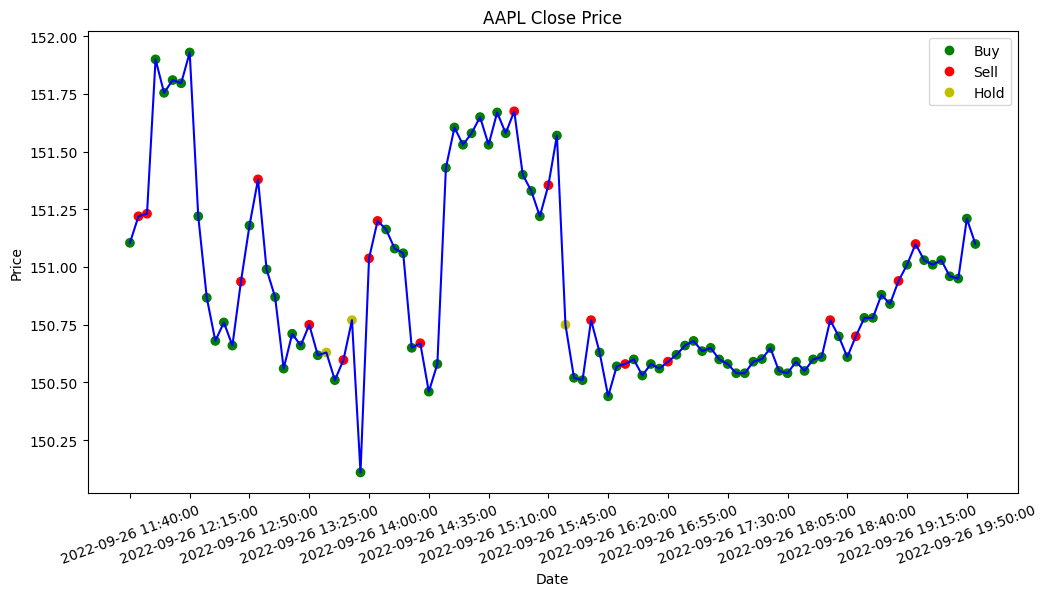

In [75]:
plot_bsh(df_300k, Q_300k,num=100, tick=7)

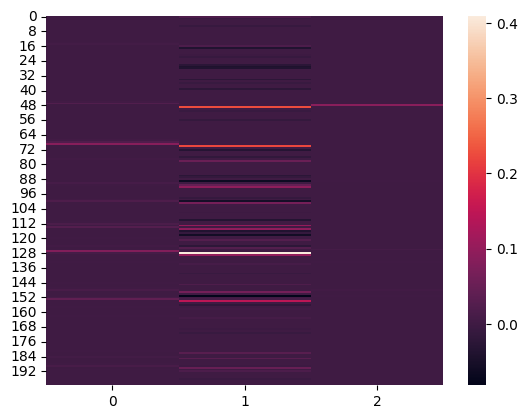

In [ ]:
# plotting the heatmap
hm = sn.heatmap(data = Q_300k[-200:,:])

# displaying the plotted heatmap
plt.show()

# all/5min/AAPL

In [ ]:
Q_all, final_capital_all = qLearning(df_aapl)


Final Q-table:
[[ 1.10263784e-10 -2.85199880e+01  0.00000000e+00]
 [ 2.71713176e-08  0.00000000e+00  0.00000000e+00]
 [ 4.91745931e-07  0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00 -1.00000000e-03  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Final capital: 275055.1149


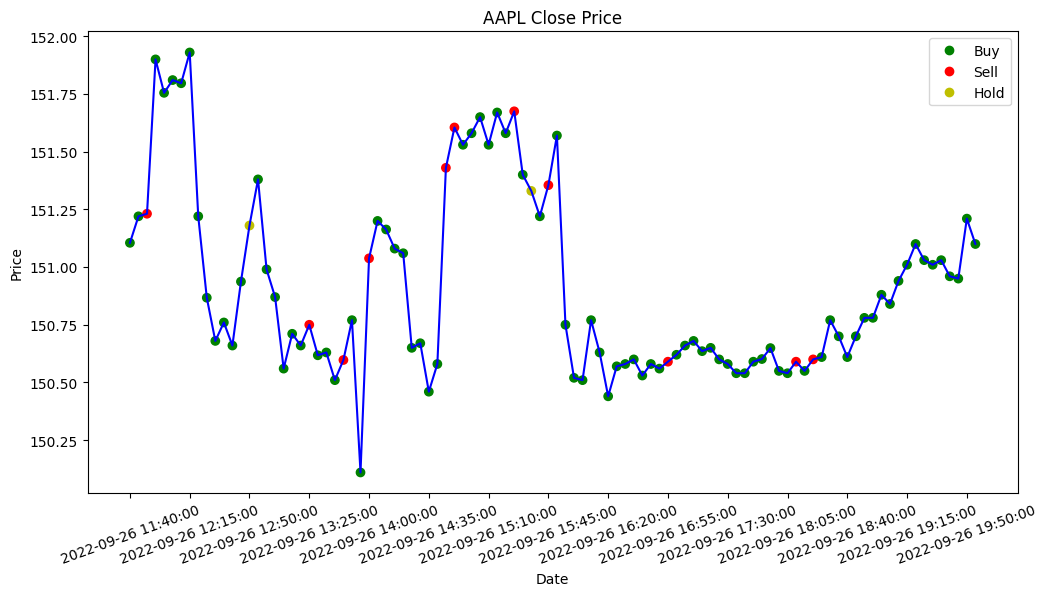

In [73]:
plot_bsh(df_aapl, Q_all, num=100, tick=7)

# all/day/AAPL

In [ ]:
df_aapl['Date'][0][:10]

'2005-01-03'

In [ ]:
df_aapl_per_day = df_aapl.copy(deep=True)
df_aapl_per_day['Date'] = df_aapl_per_day['Date'].apply(lambda x: x[:10])


In [ ]:
df_aapl_per_day = df_aapl_per_day.groupby('Date').mean()
df_aapl_per_day

,Open,High,Low,Close,Volume
Date,,,,,
2005-01-03,0.968476,0.969599,0.967033,0.968325,5.986085e+06
2005-01-04,0.978524,0.980145,0.976653,0.978637,9.264425e+06
2005-01-05,0.983649,0.984830,0.982456,0.983745,5.889069e+06
2005-01-06,0.981954,0.983080,0.980565,0.981882,6.126269e+06
2005-01-07,1.033235,1.035380,1.031542,1.033835,1.798314e+07
...,...,...,...,...,...
2022-09-20,155.490666,155.619995,155.362903,155.497447,5.001150e+05
2022-09-21,155.790562,155.939397,155.611669,155.767307,4.591475e+05
2022-09-22,152.926498,153.099891,152.770463,152.923541,4.104618e+05


In [79]:
df_aapl_per_day = df_aapl_per_day.reset_index()

In [ ]:
Q_per_day, final_capital_per_day = qLearning(df_aapl_per_day)

Final Q-table:
[[ 4.23221433e-07  0.00000000e+00  0.00000000e+00]
 [ 2.04948596e-05  0.00000000e+00  0.00000000e+00]
 [ 4.01542852e-04  0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00 -2.84376576e-01  0.00000000e+00]
 [ 0.00000000e+00 -2.52109082e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Final capital: 127474.13271876848


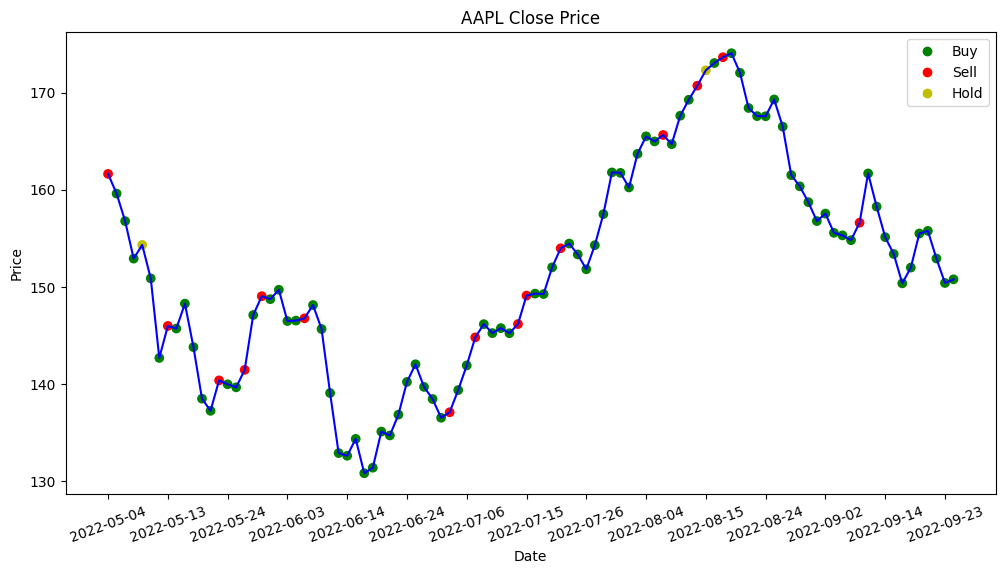

In [80]:
plot_bsh(df_aapl_per_day,Q_per_day, num=100, tick=7)